/var/folders/k7/b0_b7t6j6n72t68sh4s7t8400000gn/T/ipykernel_50966/3493607800.py:41: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/othmanbensouda/Desktop/mobile_data/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


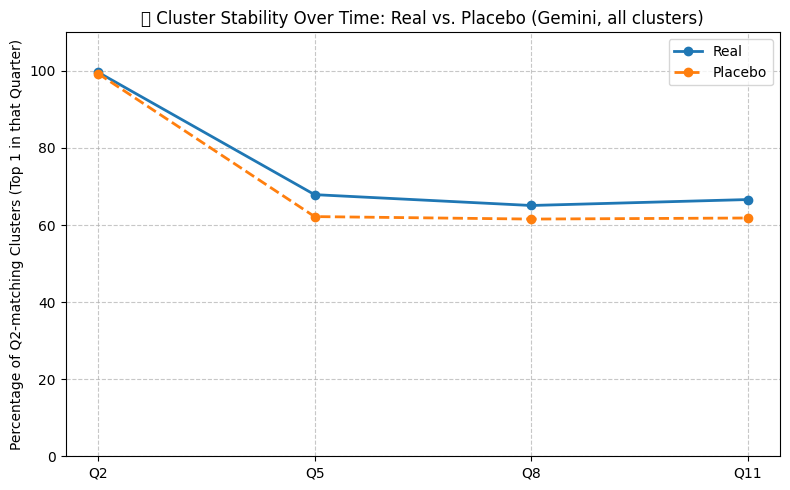

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load both datasets ===
df_real = pd.read_csv("../datasets/main_address_predictions_combined_bayesopt.csv")
df_placebo = pd.read_csv("../datasets/placebo_main_address_predictions_combined_bayesopt.csv")

def compute_stability_line(df, label):
    # Step 1: Get baseline CAIDs and their Q2 cluster
    baseline = df[(df["quarter"] == 2) & (df["is_main_address"] == 1)]
    q2_clusters = baseline[["caid", "cluster"]].rename(columns={"cluster": "q2_cluster"})

    # Step 2: Merge Q2 cluster into full dataframe
    df = df.merge(q2_clusters, on="caid", how="inner")

    # Step 3: Compare Q2 cluster with each quarter's selected cluster
    stability_by_quarter = []
    for q in [2, 5, 8, 11]:
        temp = df[(df["quarter"] == q) & (df["is_main_address"] == 1)].copy()
        temp["match_q2"] = temp["cluster"] == temp["q2_cluster"]
        pct_match = temp["match_q2"].mean() * 100
        stability_by_quarter.append(pct_match)

    return stability_by_quarter, label

# === Compute lines ===
real_values, real_label = compute_stability_line(df_real, "Real")
placebo_values, placebo_label = compute_stability_line(df_placebo, "Placebo")

# === Plot ===
quarters = ["Q2", "Q5", "Q8", "Q11"]

plt.figure(figsize=(8, 5))
plt.plot(quarters, real_values, marker='o', linewidth=2, label=real_label)
plt.plot(quarters, placebo_values, marker='o', linewidth=2, linestyle='--', label=placebo_label)
plt.ylim(0, 110)
plt.ylabel("Percentage of Q2-matching Clusters (Top 1 in that Quarter)")
plt.title("🏠 Cluster Stability Over Time: Real vs. Placebo (Gemini, all clusters)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


# Compare 250 to 250, everyone else vs everyone else 


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load datasets ===
df_real = pd.read_csv("../datasets/main_address_predictions_combined_bayesopt.csv")
df_placebo = pd.read_csv("../datasets/placebo_main_address_predictions_combined_bayesopt.csv")

# === Stability function ===
def compute_stability_line(df, label):
    # Step 1: Use Q2 clusters as baseline
    baseline = df[(df["quarter"] == 2) & (df["is_main_address"] == 1)]
    q2_clusters = baseline[["caid", "cluster"]].rename(columns={"cluster": "q2_cluster"})

    # Step 2: Merge baseline into full df
    df = df.merge(q2_clusters, on="caid", how="inner")

    # Step 3: Compute match rate per quarter
    stability_by_quarter = []
    for q in [2, 5, 8, 11]:
        temp = df[(df["quarter"] == q) & (df["is_main_address"] == 1)].copy()
        temp["match_q2"] = temp["cluster"] == temp["q2_cluster"]
        pct_match = temp["match_q2"].mean() * 100
        stability_by_quarter.append(pct_match)

    return stability_by_quarter, label


In [24]:
# === Labeled 250 (not predicted by LGBM) ===
df_real_labeled = df_real[df_real["main_address_justification"] != "Predicted by LightGBM"]
df_placebo_labeled = df_placebo[df_placebo["main_address_justification"] != "Predicted by LightGBM"]

real_values_labeled, real_label_labeled = compute_stability_line(df_real_labeled, "Real (Labeled 250)")
placebo_values_labeled, placebo_label_labeled = compute_stability_line(df_placebo_labeled, "Placebo (Labeled 250)")

# === Unlabeled (predicted by LGBM) ===
df_real_unlabeled = df_real[df_real["main_address_justification"] == "Predicted by LightGBM"]
df_placebo_unlabeled = df_placebo[df_placebo["main_address_justification"] == "Predicted by LightGBM"]

real_values_unlabeled, real_label_unlabeled = compute_stability_line(df_real_unlabeled, "Real (predicted by lightgbm)")
placebo_values_unlabeled, placebo_label_unlabeled = compute_stability_line(df_placebo_unlabeled, "Placebo (predicted by lightgbm)")


/var/folders/k7/b0_b7t6j6n72t68sh4s7t8400000gn/T/ipykernel_50966/3235271209.py:14: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


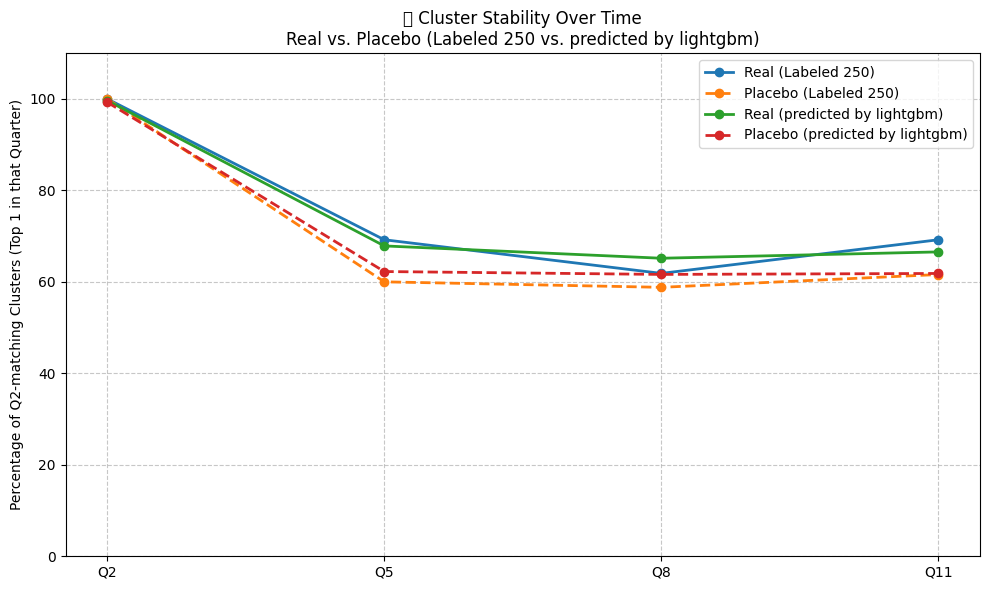

In [26]:
quarters = ["Q2", "Q5", "Q8", "Q11"]

plt.figure(figsize=(10, 6))
plt.plot(quarters, real_values_labeled, marker='o', linewidth=2, label=real_label_labeled)
plt.plot(quarters, placebo_values_labeled, marker='o', linewidth=2, linestyle='--', label=placebo_label_labeled)
plt.plot(quarters, real_values_unlabeled, marker='o', linewidth=2, label=real_label_unlabeled)
plt.plot(quarters, placebo_values_unlabeled, marker='o', linewidth=2, linestyle='--', label=placebo_label_unlabeled)

plt.ylim(0, 110)
plt.ylabel("Percentage of Q2-matching Clusters (Top 1 in that Quarter)")
plt.title("🏠 Cluster Stability Over Time\nReal vs. Placebo (Labeled 250 vs. predicted by lightgbm)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


# Take a different basis and see what percentage of the other quarters there are

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# === Load both datasets ===
df_real = pd.read_csv("../datasets/main_address_predictions_combined_bayesopt.csv")
df_placebo = pd.read_csv("../datasets/placebo_main_address_predictions_combined_bayesopt.csv")

# === Stability function with flexible reference quarter ===
def compute_stability_line(df, label, reference_quarter=2):
    # Step 1: Get baseline CAIDs and their reference quarter cluster
    baseline = df[(df["quarter"] == reference_quarter) & (df["is_main_address"] == 1)]
    baseline_clusters = baseline[["caid", "cluster"]].rename(columns={"cluster": "ref_cluster"})

    # Step 2: Merge reference cluster into full dataframe
    df = df.merge(baseline_clusters, on="caid", how="inner")

    # Step 3: Compare reference cluster with each quarter's main cluster
    stability_by_quarter = []
    for q in sorted(df["quarter"].unique()):
        temp = df[(df["quarter"] == q) & (df["is_main_address"] == 1)].copy()
        temp["match_ref"] = temp["cluster"] == temp["ref_cluster"]
        pct_match = temp["match_ref"].mean() * 100
        stability_by_quarter.append(pct_match)

    return stability_by_quarter, label


/var/folders/k7/b0_b7t6j6n72t68sh4s7t8400000gn/T/ipykernel_50966/3441403460.py:18: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/othmanbensouda/Desktop/mobile_data/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


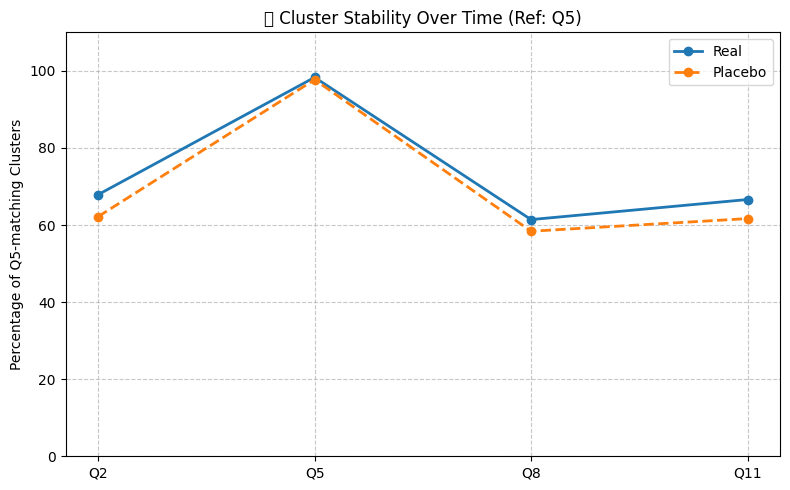

In [21]:
# Change this to use a different reference quarter
reference_q = 5  # Example: Use Q5 as the baseline

real_values, real_label = compute_stability_line(df_real, "Real", reference_quarter=reference_q)
placebo_values, placebo_label = compute_stability_line(df_placebo, "Placebo", reference_quarter=reference_q)

quarters = [f"Q{q}" for q in sorted(df_real["quarter"].unique())]

# === Plot ===
plt.figure(figsize=(8, 5))
plt.plot(quarters, real_values, marker='o', linewidth=2, label=real_label)
plt.plot(quarters, placebo_values, marker='o', linewidth=2, linestyle='--', label=placebo_label)
plt.ylim(0, 110)
plt.ylabel(f"Percentage of Q{reference_q}-matching Clusters")
plt.title(f"🏠 Cluster Stability Over Time (Ref: Q{reference_q})")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/k7/b0_b7t6j6n72t68sh4s7t8400000gn/T/ipykernel_50966/2802265335.py:18: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/othmanbensouda/Desktop/mobile_data/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


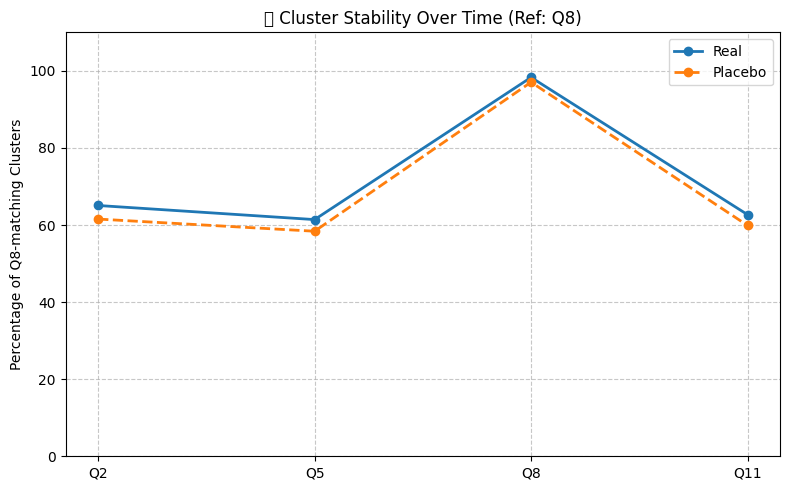

In [22]:
# Change this to use a different reference quarter
reference_q = 8  # Example: Use Q5 as the baseline

real_values, real_label = compute_stability_line(df_real, "Real", reference_quarter=reference_q)
placebo_values, placebo_label = compute_stability_line(df_placebo, "Placebo", reference_quarter=reference_q)

quarters = [f"Q{q}" for q in sorted(df_real["quarter"].unique())]

# === Plot ===
plt.figure(figsize=(8, 5))
plt.plot(quarters, real_values, marker='o', linewidth=2, label=real_label)
plt.plot(quarters, placebo_values, marker='o', linewidth=2, linestyle='--', label=placebo_label)
plt.ylim(0, 110)
plt.ylabel(f"Percentage of Q{reference_q}-matching Clusters")
plt.title(f"🏠 Cluster Stability Over Time (Ref: Q{reference_q})")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/k7/b0_b7t6j6n72t68sh4s7t8400000gn/T/ipykernel_50966/935423961.py:18: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/othmanbensouda/Desktop/mobile_data/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127968 (\N{HOUSE BUILDING}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


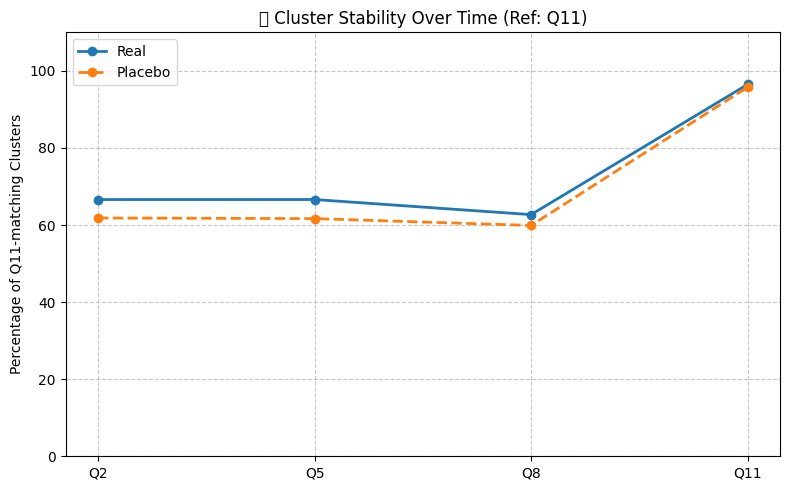

In [23]:
# Change this to use a different reference quarter
reference_q = 11  # Example: Use Q5 as the baseline

real_values, real_label = compute_stability_line(df_real, "Real", reference_quarter=reference_q)
placebo_values, placebo_label = compute_stability_line(df_placebo, "Placebo", reference_quarter=reference_q)

quarters = [f"Q{q}" for q in sorted(df_real["quarter"].unique())]

# === Plot ===
plt.figure(figsize=(8, 5))
plt.plot(quarters, real_values, marker='o', linewidth=2, label=real_label)
plt.plot(quarters, placebo_values, marker='o', linewidth=2, linestyle='--', label=placebo_label)
plt.ylim(0, 110)
plt.ylabel(f"Percentage of Q{reference_q}-matching Clusters")
plt.title(f"🏠 Cluster Stability Over Time (Ref: Q{reference_q})")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()
